# Logistic Regression

## $ W{\text{new}} = W{\text{old}} + \eta (Y{\text{j}} - Y{\text{pred}}) X{\text{j}} $

## $ Y{\text{pred}} = \sigma( \sum_{i=0}^{n} W{\text{i}} X{\text{i}})  $

## $ \sigma(x) = \frac{1}{1 + e^{-x}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [2]:
class logistic_regression:

    def __init__(self , learning_rate , epochs = 3500 ):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.coef_ = None
        self.intercept_ = None

    def fit(self , X_train , Y_train):

        X = np.array(X_train) if not isinstance(X_train , np.ndarray) else X_train
        Y = np.array(Y_train) if not isinstance(Y_train , np.ndarray) else Y_train

        X = np.insert(X , 0 , 1 , axis = 1)
        self.coef_ = np.ones((1,X.shape[1]), dtype = float)
        self.coef_[0][0] = 0

        for _ in range(self.epochs):
            i = np.random.randint(0,X.shape[0])
            z = np.dot(self.coef_ , X[i])
                 
            Y_pred =1/(1 + np.exp(-z))
                  
            self.coef_ = self.coef_ + self.learning_rate * ( Y[i] - Y_pred) * X[i]
            
        self.intercept_ = self.coef_[0,0]
        self.coef_ = self.coef_[0,1:]

    def predict(self , X_test):
        X = X_test.values if isinstance(X_test , pd.DataFrame) else X_test

        return ((np.dot(self.coef_ , X.T) + self.intercept_) > 0).astype(int)
            

In [3]:
X , Y = make_classification(n_samples = 1000 , n_features = 2 , n_informative = 1 , n_redundant = 0 , n_classes = 2 ,
                            n_clusters_per_class = 1, random_state = 50 , hypercube = False , class_sep = 5)

X.shape , Y.shape

((1000, 2), (1000,))

In [4]:
pd.DataFrame({'feature1' : X[:,0] , 'feature2' : X[:,1] , 'Target' : Y}).sample(4)

,feature1,feature2,Target
581,-0.355713,0.153823,0
546,0.367748,0.798316,1
874,0.362266,-0.414035,1
939,-0.569259,-1.438259,0


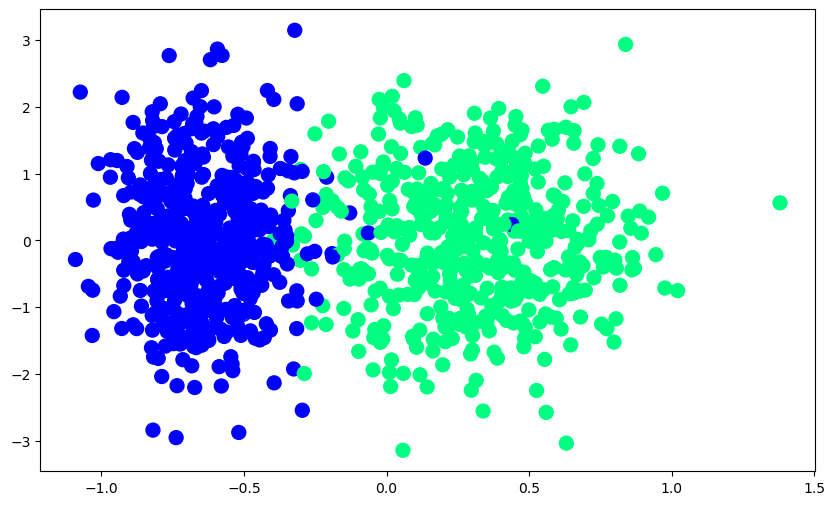

In [5]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0] , X[:,1] , c=Y  , cmap = 'winter' ,s=100)

In [6]:
obj = logistic_regression(0.5)

obj.fit(X , Y)

print(obj.intercept_ , obj.coef_)

obj.predict(np.array([[0.961626	,1.205001]]))

3.6043771492840917 [14.25591569 -0.07743652]


array([1])

In [7]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 12)

X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [160]:
obj = logistic_regression(0.1)

obj.fit(X_train , Y_train)

print(obj.intercept_ , obj.coef_)

obj.predict(X_test)

2.07096245574649 [9.06942341 0.04269459]


array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0])

In [161]:
Y_test

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0])

In [162]:
slope = - obj.coef_[0] / obj.coef_[1] 
intercept = - obj.intercept_ / obj.coef_[1]  
slope , intercept

(-212.42557852020053, -48.50643508305768)

## Different Data

In [163]:
X_input = np.linspace(-3,3,100)
Y_input = slope * X_input + intercept

(-3.0, 2.0)

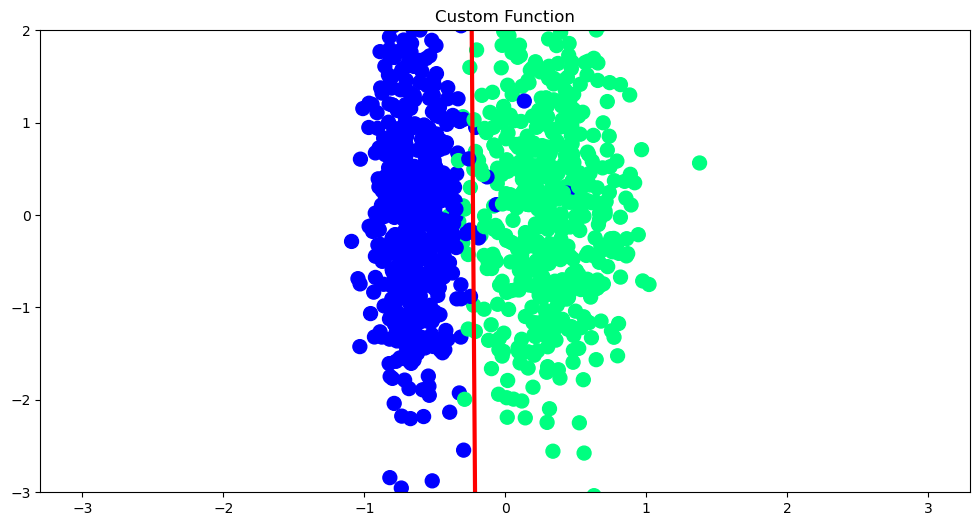

In [171]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0] , X[:,1] , c=Y  , cmap = 'winter' ,s=100)
plt.plot(X_input , Y_input , color = 'red' , linewidth = 3)
plt.title('Custom Function')
plt.ylim(-3,2)

# SKLearn Logistic Regression

In [172]:
lor = LogisticRegression()
lor.fit(X_train,Y_train)

LogisticRegression()

In [173]:
slope = - lor.coef_[0][0] / lor.coef_[0][1] 
intercept = - lor.intercept_ / lor.coef_[0][1]  
slope , intercept

(-482.3886816081017, array([-108.09705818]))

In [174]:
X_input_skl = np.linspace(-3,3,100)
Y_input_skl = slope * X_input + intercept

(-3.0, 2.0)

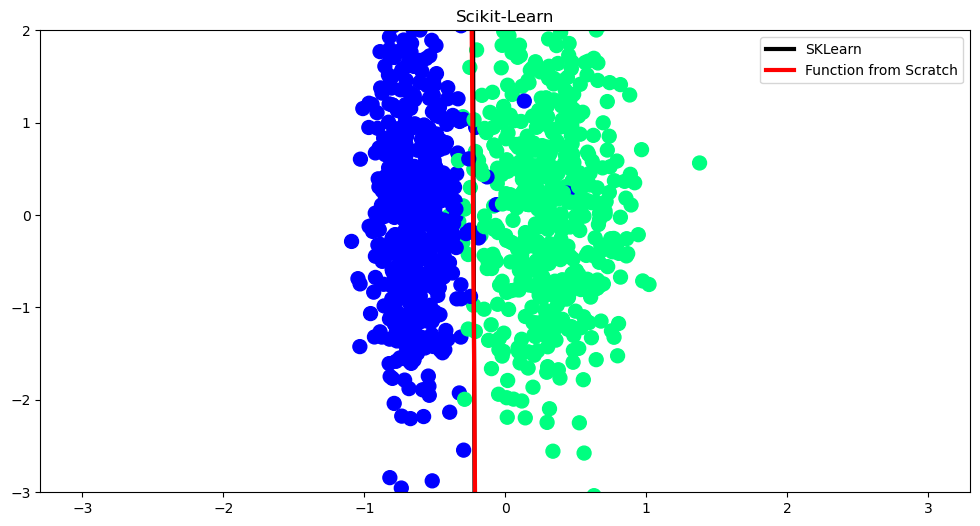

In [176]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0] , X[:,1] , c=Y  , cmap = 'winter' ,s=100)
plt.plot(X_input_skl , Y_input_skl , color = 'black' , linewidth = 3 , label = 'SKLearn')
plt.plot(X_input , Y_input , color = 'red' , linewidth = 3 , label = 'Function from Scratch')
plt.legend()
plt.title('Scikit-Learn')
plt.ylim(-3,2)

# Decision Surface

<Axes: >

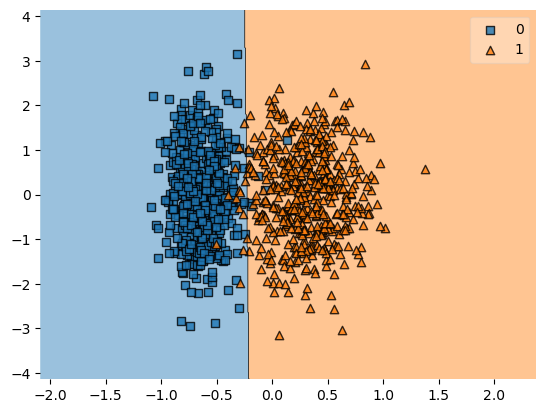

In [169]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X , Y , clf = obj)